# TASK#2: Prediction Using Unsupervised ML

Author: Molka Trabelsi 

# Importing all the required libraries


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mt
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Data Preparation

 Load the dataset

In [2]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)


Data Preprocessing

In [3]:
df.head(150)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df.shape


(150, 4)

In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [11]:
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Determining Optimal Number of Clusters for K-means Clustering using the Elbow Method

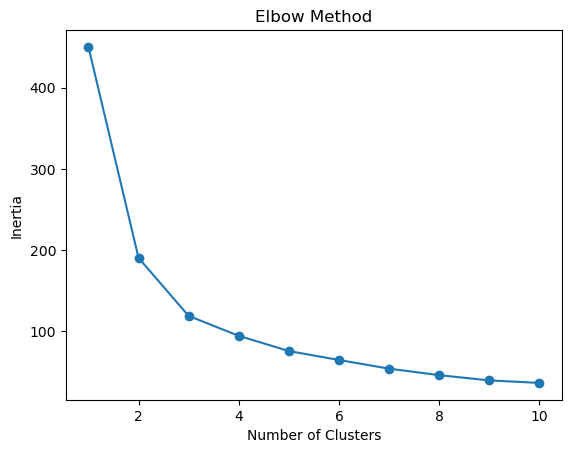

In [16]:
# Extract the features
features = df.iloc[:, :-1].values

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-means clustering for different number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the inertia (within-cluster sum of squares) vs. number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


# Creating the k-means classifier


In [7]:
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans=kmeans.fit_predict(features)

# Visualize the Clusters

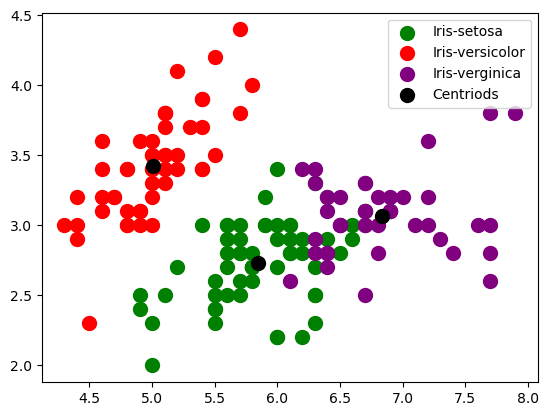

In [14]:
#visualising th clusters
mt.scatter(features[y_kmeans==0,0], features[y_kmeans==0,1], s=100, c='green', label='Iris-setosa')
mt.scatter(features[y_kmeans==1,0], features[y_kmeans==1,1], s=100, c='red', label='Iris-versicolor')
mt.scatter(features[y_kmeans==2,0], features[y_kmeans==2,1], s=100, c='purple', label='Iris-verginica')

#plotting centriods of clusters
mt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centriods')
mt.legend()